Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








> 90.483
> 91.417
> 91.075
> 90.575
> 91.250
Accuracy: mean=90.960 std=0.369, n=5


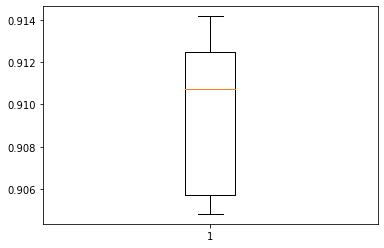

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm


def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories




def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  pyplot.boxplot(scores)
  pyplot.show()

	

def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	scores, histories = evaluate_model(trainX, trainY)

	summarize_performance(scores)


run_test_harness()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm


def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	model.save('final_model.h5')
 
run_test_harness()

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img

def run_example():
	img = load_image('/content/sample_image.png')
	model = load_model('final_model.h5')
	result = model.predict(img)
	print(result[0])

run_example()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


[3.0770739e-06 4.3018322e-10 9.9999690e-01 5.3999558e-11 3.3182246e-10
 8.4506892e-14 3.4384329e-09 4.5402003e-14 5.8429078e-12 3.4281693e-14]
